# Prosper Loan Data Exploration
## by Dayane Sallet

## Preliminary Wrangling
This dataset is composed of 113,937 loans and for each entry there are 81 variables. Those variables include loan amount, borrower rate, current loan status, borrower income, and many others.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [118]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [15]:
df.LP_NetPrincipalLoss.unique()

array([   0.  , 3790.25, 6012.67, ..., 2883.  , 2176.51, 2536.1 ])

In [101]:
# High-level overview of data shape and composition
# Display all columns and data types
pd.set_option('display.max_rows', 81)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           113937 non-null  object  
 1   ListingNumber                        113937 non-null  int64   
 2   ListingCreationDate                  113937 non-null  object  
 3   CreditGrade                          28953 non-null   object  
 4   Term                                 113937 non-null  int64   
 5   LoanStatus                           113937 non-null  object  
 6   ClosedDate                           55089 non-null   object  
 7   BorrowerAPR                          113912 non-null  float64 
 8   BorrowerRate                         113937 non-null  float64 
 9   LenderYield                          113937 non-null  float64 
 10  EstimatedEffectiveYield              84853 non-null   float64 
 11  

In [99]:
print(df.shape)
print(df.describe())

(113937, 81)
       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.18

There are variables with a lot of null values. Also, there are many variables which seem to be of institutional use and do not bring any useful information.  
There are many variables set as object type, which could be changed to facilitate its' usage.

### What is the structure of your dataset?

The data is structured in 113,937 loan entries in which each entry has 81 different variables. These variables are mostly numeric, however there are some categorical variables. 

Numeric variables are mainly values indicating total loan amount, yield, payment rates and overall rates. On the other hand, categorical variables indicate dates and characteristics of the borrowers.


### What is/are the main feature(s) of interest in your dataset?

The main featuers of interest in the dataset is to understand the main characteristics of borrowers that are "good payers" and borrowers that delay or do not finish payments. This means we want to evaluate the LoanStatus and the CurrentDelinquencies, observing which characteristics are common to those who have completed or current loans with no delinquencies.
Therefore, it will be of interest the analysis:
* Factors that influence the most the outcome status.
* How the interest rate vary among the borrowers. (Is there any low rates for those who pay in day?)
* The influence of loan amount in the outcome status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that borrowers which are considered "good payers" are employed, own a house, have no current or past delinquencies and have loans that are not too high or low.   
Moreover, those "good payers" have low borrower APR and rate.  

The variables to be considered are: ListinCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, ProsperScore, ListingCategory, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, AvailableBankcardCredit, LoanOriginalAmount, LoanOriginationDate, DebtToIncomeRatio, IncomeRange

#### Some useful modifications to the original data

In [143]:
variables = ['ListinCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 
 'ProsperScore', 'ListingCategory', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 
 'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 
 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 
 'PublicRecordsLast12Months', 'AvailableBankcardCredit', 'LoanOriginalAmount', 'LoanOriginationDate', 
 'DebtToIncomeRatio',  'IncomeRange']
not_variables = df.columns[df.columns.isin(variables)==False]

In [145]:
df_loan = df.copy()
df_loan.drop(not_variables, axis=1, inplace=True)
df_loan.head()

,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperScore,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,LoanOriginationDate
0,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,NaN,Other,Self-employed,2.0,True,5.0,4.0,12.0,2.0,472.0,4.0,0.0,0.0,1500.0,0.17,"$25,000-49,999",9425,2007-09-12 00:00:00
1,NaN,36,Current,NaN,0.12016,0.0920,7.0,Professional,Employed,44.0,False,14.0,14.0,29.0,0.0,0.0,0.0,1.0,0.0,10266.0,0.18,"$50,000-74,999",10000,2014-03-03 00:00:00
2,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,NaN,Other,Not available,NaN,False,NaN,NaN,3.0,1.0,NaN,0.0,0.0,NaN,NaN,0.06,Not displayed,3001,2007-01-17 00:00:00
3,NaN,36,Current,NaN,0.12528,0.0974,9.0,Skilled Labor,Employed,113.0,True,5.0,5.0,29.0,4.0,10056.0,14.0,0.0,0.0,30754.0,0.15,"$25,000-49,999",10000,2012-11-01 00:00:00
4,NaN,36,Current,NaN,0.24614,0.2085,4.0,Executive,Employed,44.0,True,19.0,19.0,49.0,0.0,0.0,0.0,0.0,0.0,695.0,0.26,"$100,000+",15000,2013-09-20 00:00:00


## Univariate Exploration

First, I want to observe to distribution of loan status in the dataset.

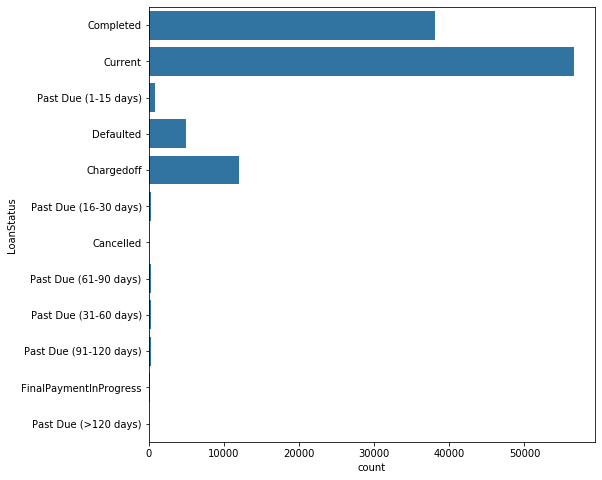

In [20]:
fig, ax = plt.subplots(figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'LoanStatus', color = default_color)

plt.show()

It is possible to observe that the majority of loans are current and this value is followed by loans which were compelted.  
It is possible to observe a considerable number of chargedoff and defaulted loans.    
It is not possible to have a clean observarion of past due loans, which need a closer look.

Loans that are defaulted and charged off will be directly linked to "bad payers". This is so because loans in "default" are those in which borrower is not paying for an extended period of time and loans "charged off" are no longer expected to be payed. [1]

[1] https://help.lendingclub.com/hc/en-us/articles/216127747-What-is-the-difference-between-a-loan-that-is-in-default-and-a-loan-that-has-been-charged-off-

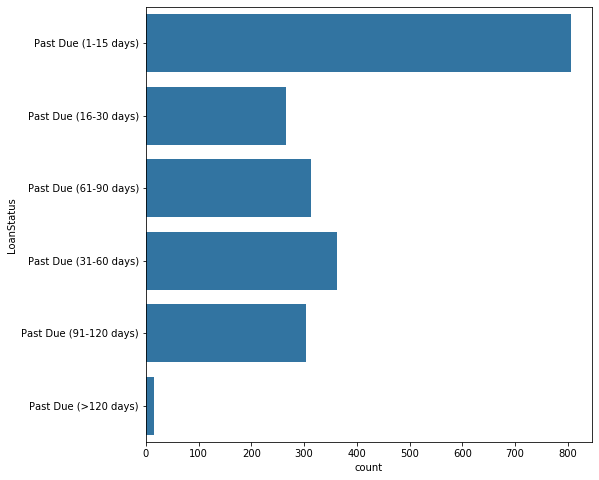

In [24]:
past_due = ['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']

fig, ax = plt.subplots(figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df[df.LoanStatus.isin(past_due)], y = 'LoanStatus', color = default_color)

plt.show()

Here it is possible to see that majority of past due loans are within 15 days.  
As deliquents are considered to be those that exceed 30 past due days [2], those will be the ones considered "bad payers".

"Bad payers" will be considered those with Loan Status:
* Defaulted 
* Chargedoff
* Past Due (31-60 days)
* Past Due (61-90 days)
* Past Due (91-120 days)
* Past Due (>120 days)'

[2] https://www.investopedia.com/terms/p/past-due.asp

Now, let's give a look in the EmploymentStatus in order to understand if borrowers have any source of money to pay the loan.

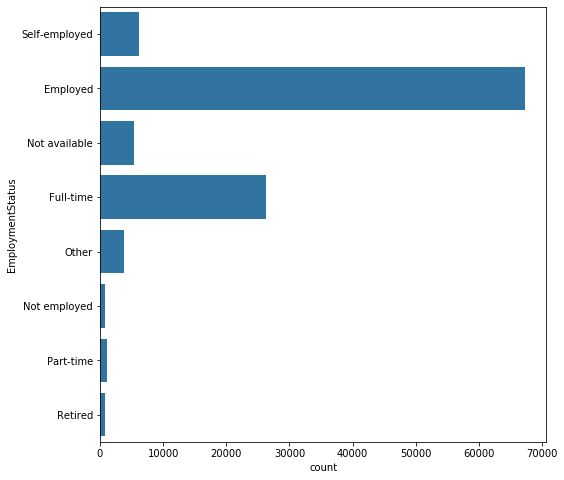

In [26]:
fig, ax = plt.subplots(figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'EmploymentStatus', color = default_color)

plt.show()

Here, it is possible to noticed that majority of borrowers are employed.

Now, let's try to investigate if borrowers are homeowners, as this information could be an indication of stability and a higher likelihood to pay the loan, 

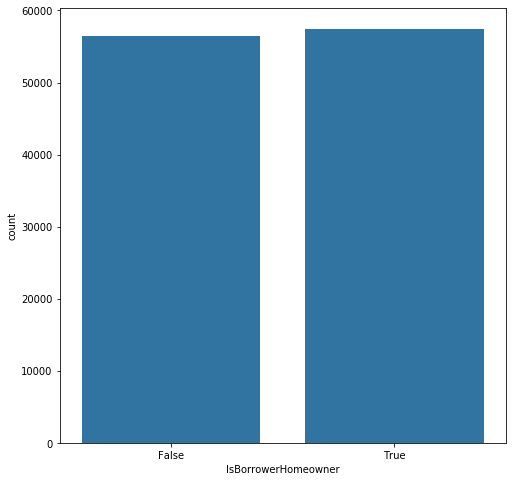

In [28]:
fig, ax = plt.subplots(figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = default_color)

plt.show()

The number of borrowers that do and do not own a house is similar.

The distribution of borrowers current number of credit lines:

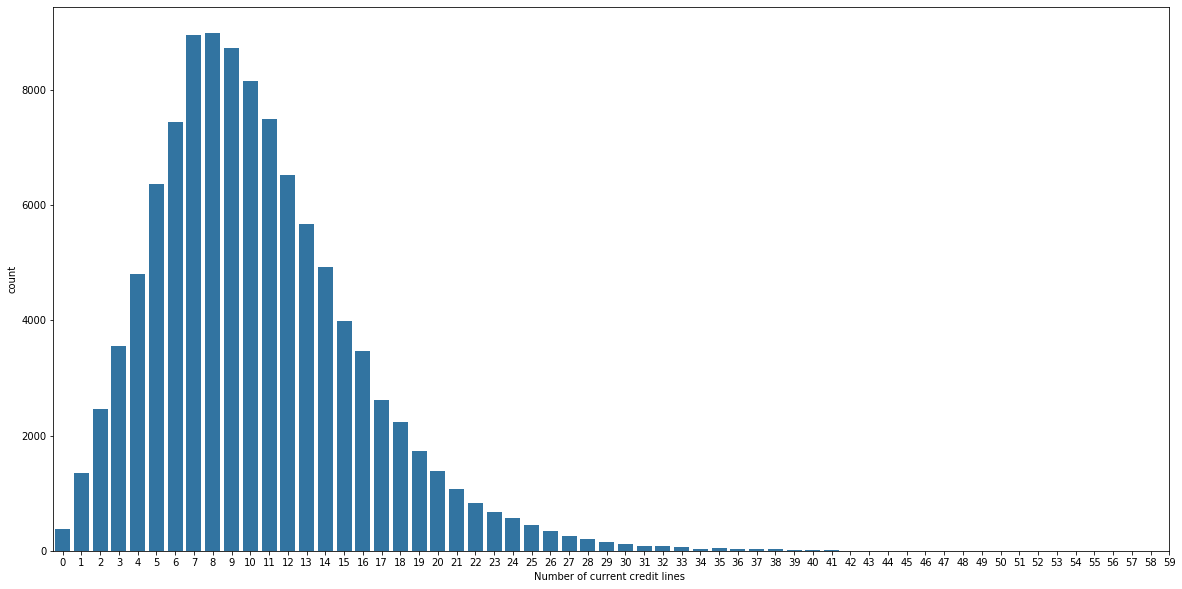

In [42]:
fig, ax = plt.subplots(figsize = [20,10])
ticks = np.arange(0, df.CurrentCreditLines.max()+1,1).astype(int)
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'CurrentCreditLines', color = default_color)
plt.xlabel('Number of current credit lines ')
plt.xticks(ticks, ticks)
plt.show()

In [78]:
print(df.CurrentCreditLines.mode())
print(df.CurrentCreditLines.mean())

0    8.0
dtype: float64
10.317192216903502


The distribution is right-skewed, in which the mode is 8 and the mean is around 10 lines. 

The distribution of borrowers open number of credit lines:

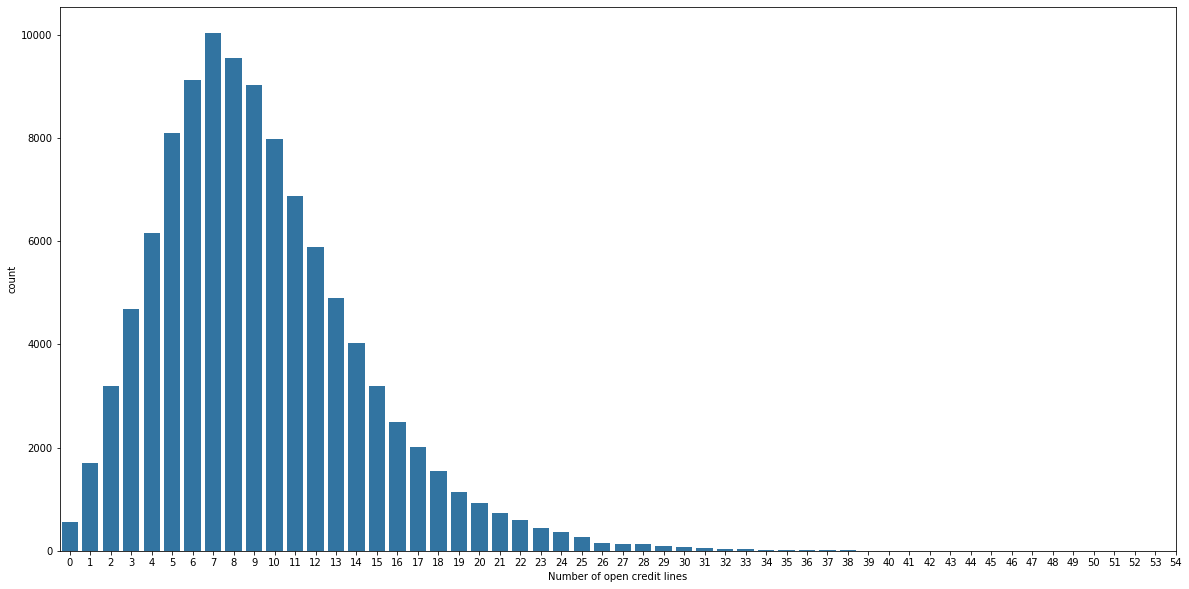

In [45]:
fig, ax = plt.subplots(figsize = [20,10])
ticks = np.arange(0, df.OpenCreditLines.max()+1,1).astype(int)
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'OpenCreditLines', color = default_color)
plt.xlabel('Number of open credit lines')
plt.xticks(ticks, ticks)
plt.show()

In [80]:
print(df.OpenCreditLines.mode())
print(df.OpenCreditLines.mean())

0    7.0
dtype: float64
9.260163824964968


The distribution is right-skewed as well, in which the mode is 7 and the mean is around 9 lines.  
Also, we can notice that most borrowers have open credit lines.

The distribution number of credit lines in the past seven years:

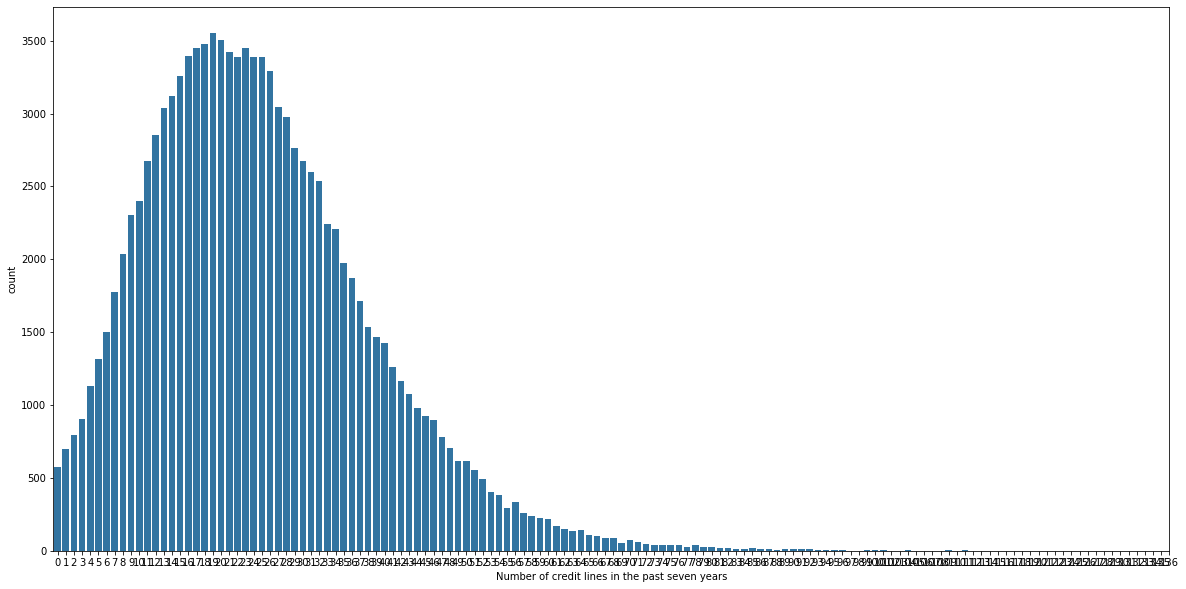

In [46]:
fig, ax = plt.subplots(figsize = [20,10])
ticks = np.arange(0, df.TotalCreditLinespast7years.max()+1,1).astype(int)
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'TotalCreditLinespast7years', color = default_color)
plt.xlabel('Number of credit lines in the past seven years')
plt.xticks(ticks, ticks)
plt.show()

In [81]:
print(df.TotalCreditLinespast7years.mode())
print(df.TotalCreditLinespast7years.mean())

0    21.0
dtype: float64
26.75453903214412


Following the previously displayed distributions, this one is also right-skewed. The mode is 21 and the mean is around 26 lines.
It is possible to observe that in the past seven years the majority of borrowers had credibility to have a line of credit.

Distribution of number of accounts delinquent:

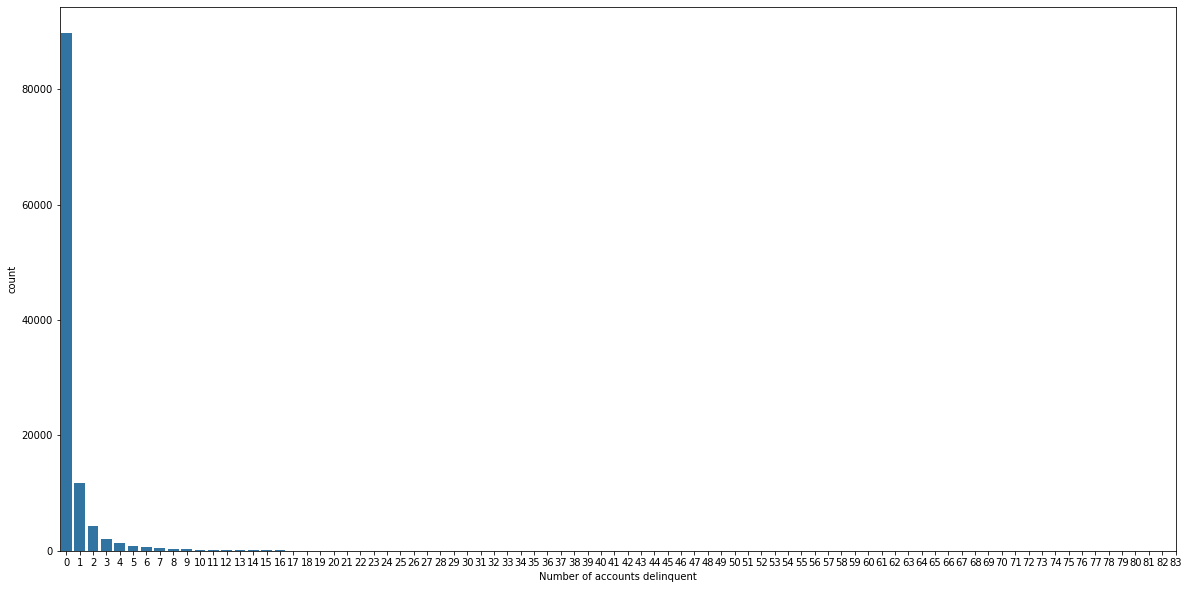

In [48]:
fig, ax = plt.subplots(figsize = [20,10])
ticks = np.arange(0, df.CurrentDelinquencies.max()+1,1).astype(int)
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'CurrentDelinquencies', color = default_color)
plt.xlabel('Number of accounts delinquent')
plt.xticks(ticks, ticks)
plt.show()

In [83]:
df[df['CurrentDelinquencies'] > 10]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
42,10AD33803102786533722BB,93263,2007-02-04 17:24:27.850000000,HR,36,Chargedoff,2008-08-08 00:00:00,0.30300,0.2900,0.2850,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Other,Not available,NaN,False,False,NaN,2007-02-03 20:57:08.027000000,520.0,539.0,1997-10-24 00:00:00,NaN,NaN,20.0,0,0.0,1.0,9.0,14.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27,Not displayed,True,416.666667,2D433381278297817311230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2161,18.0,85,7286,1500,2007-02-09 00:00:00,Q1 2007,5CCA33798155110380A1C68,62.86,817.1800,403.08,414.1000,-7.14,0.00,1096.92,1096.92,0.0,1.0,0,0,0.0,15
61,10223596029543318E1A9FB,1053659,2013-12-05 11:15:32.567000000,NaN,36,Current,NaN,0.16324,0.1274,0.1174,0.1121,0.0424,0.0697,5.0,B,8.0,19,DE,Analyst,Employed,103.0,True,False,NaN,2013-12-05 11:15:38,660.0,679.0,1988-02-01 00:00:00,6.0,5.0,62.0,6,76.0,4.0,13.0,20.0,72705.0,72.0,2.0,0.0,414.0,0.19,1215.0,47.0,0.74,2.0,0.03,"$75,000-99,999",True,7108.333333,D33D37012238113149FE245,2.0,4.0,4.0,0.0,0.0,19000.0,0.01,NaN,0,NaN,3,119808,2000,2013-12-09 00:00:00,Q4 2013,390F3425936978880F70527,67.14,133.5819,91.49,42.0919,-3.36,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
113,10CB3381860531415ABCC0F,102723,2007-02-23 01:40:19.853000000,HR,36,Completed,2010-02-28 00:00:00,0.30564,0.2900,0.2800,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Other,Self-employed,37.0,False,False,NaN,2007-02-22 17:31:18.487000000,520.0,539.0,1999-04-02 00:00:00,1.0,0.0,19.0,0,0.0,0.0,8.0,13.0,6059.0,25.0,0.0,0.0,0.0,0.00,0.0,14.0,0.06,1.0,0.04,"$50,000-74,999",True,4166.666667,6F8333836894606919EF9BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,85,7968,3000,2007-02-28 00:00:00,Q1 2007,8A8C3382615470032545608,0.00,4641.9200,2910.09,1731.8300,-50.12,-90.58,0.00,0.00,0.0,1.0,1,0,0.0,39
247,11E23365730062056F90FEB,24677,2006-07-14 12:32:33.113000000,E,36,Completed,2009-07-25 00:00:00,0.19582,0.1775,0.1725,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,True,3D4D3366260257624AB272D,2006-06-28 12:31:13.830000000,540.0,559.0,1990-07-01 00:00:00,NaN,NaN,48.0,2,29.0,1.0,5.0,14.0,NaN,38.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12,Not displayed,True,2666.666667,3E793364449465277EF127E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,92,2082,1000,2006-07-25 00:00:00,Q3 2006,156B3364462532930728CA5,27.61,1300.5000,1000.00,300.5000,-8.46,0.00,0.00,0.00,0.0,1.0,0,0,0.0,13
252,1017337493703898808C9A0,72615,2006-12-09 16:15:23.210000000,HR,36,Chargedoff,2008-03-22 00:00:00,0.29925,0.2900,0.28

Most borrowers have no deliquent accounts.  
We can also observe that those with high number of current delinquencies are quite few compared to the total number of borrowers.

Distribution of number of amount delinquent:

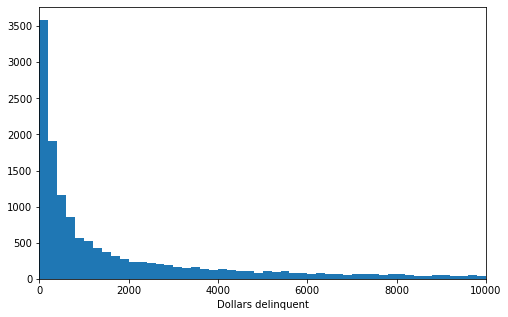

In [64]:
bins = np.arange(0, df['AmountDelinquent'].max()+200, 200)

plt.figure(figsize=[8, 5])
plt.hist(data = df[df['AmountDelinquent'] != 0], x = 'AmountDelinquent', bins = bins)
plt.xlabel('Dollars delinquent')
plt.xlim(0,10000)
plt.show()

Most of deliquents owe less than 2,000 dollars.

Distribution of Loans initial amount:

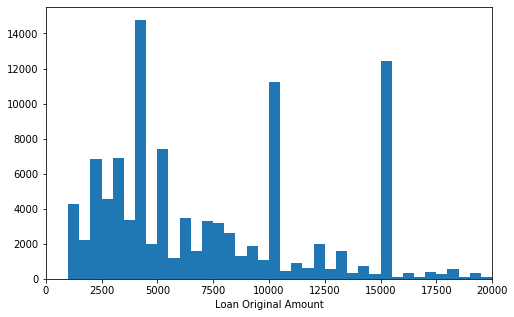

In [97]:
bins = np.arange(0, df['LoanOriginalAmount'].max()+500, 500)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins =bins)
plt.xlabel('Loan Original Amount')
plt.xlim(0,20000)
plt.show()

It is possible to notice some peaks of values in the distribution around 4000,10000 and 15000.

Distribution of number of term:

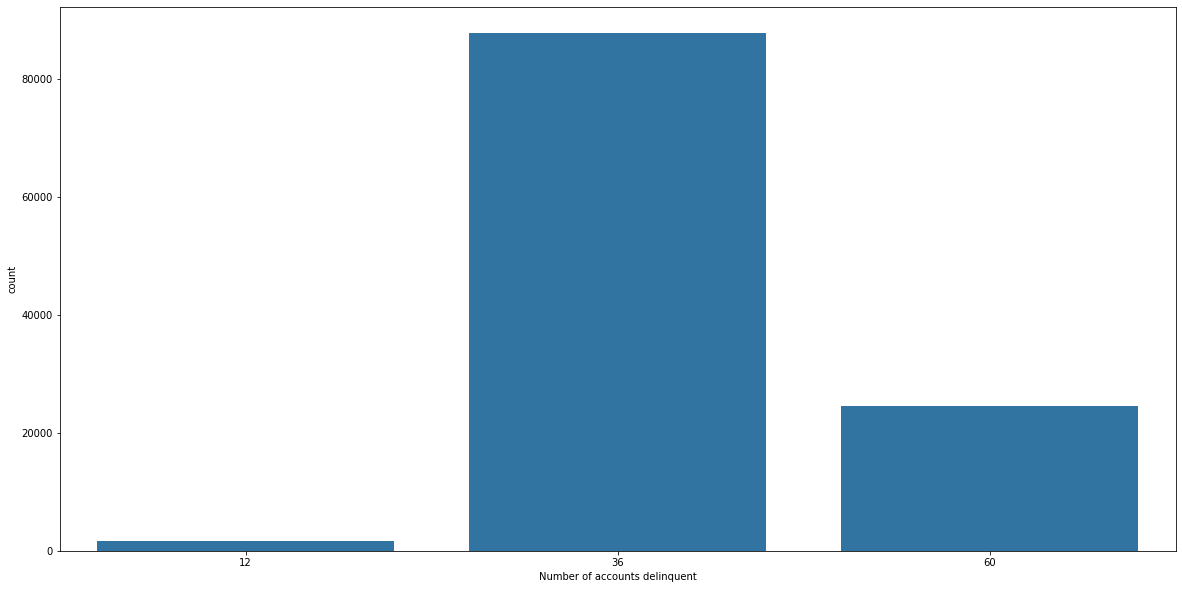

In [75]:
fig, ax = plt.subplots(figsize = [20,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Term', color = default_color)
plt.xlabel('Number of terms')
plt.show()

Most loans are 36 months long.

In [85]:
df.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [86]:
# convert IncomeRange into ordered categorical type
income_range = ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                '$75,000-99,999', '$100,000+']
income_ranges = pd.api.types.CategoricalDtype(ordered = True, categories = income_range)
df['IncomeRange'] = df['IncomeRange'].astype(income_ranges)

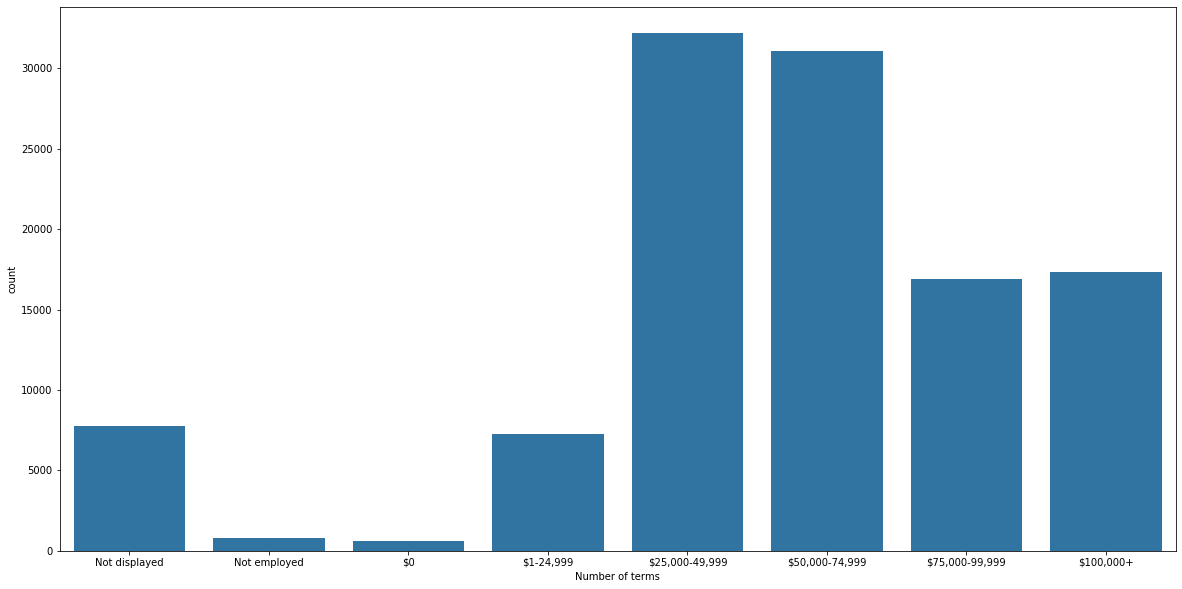

In [87]:
fig, ax = plt.subplots(figsize = [20,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'IncomeRange', color = default_color)
plt.xlabel('Number of terms')
plt.show()

Most of borrowers earn between more than 25,000, and most of borrowers earn in range between 25,000 and 49,999.

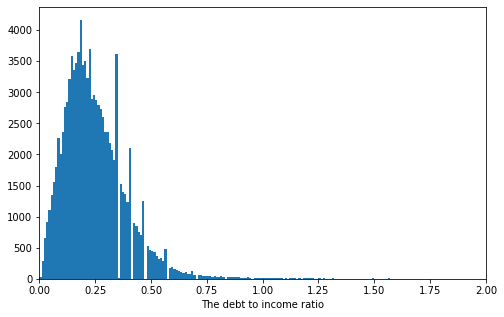

In [92]:
bins = np.arange(0, df['DebtToIncomeRatio'].max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'DebtToIncomeRatio', bins =bins)
plt.xlabel('The debt to income ratio')
plt.xlim(0,2)
plt.show()

The debt to income ratio is right-skewed and it indicates that the majority of borrowers have a debt that is smaller than their income.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variables of interest display that most borrowers do pay their loan and those who do not pay have less than 5 delinquencis.  
It was not observed any unusual point and no transformation was needed. Some attention might be brought to the fact of peaks in some values of loan amount perhaps there could be an amount for which borrowers are less likely to pay.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The features investigated do not display any unusual distribution. No operations were needed in order change data, apart from the motification of data type for the income range, in order to have a more meaninful visualization.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!